## Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import xgboost as xgb

from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Import Data

In [2]:
#mydata = pd.read_excel('/content/ReceiveCR.xlsx')
mydata = pd.read_excel('/home/fil100/Downloads/IncreaseLoad.xlsx')
mydata

,Time,CPU edge average (1),CPU edge average (2),CPU server average,BW edge (1),BW edge (1).1,BW server (1),BW server (2),# edge device,# links (1),# links (2),# VNF Density current,# VNF Receive current,# VNF Density future,# VNF Receive Future
0,0,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,40
1,1,3.280000,27.333333,0.800,0.080000,0.666667,24.000000,12.000000,36,1,2,0,40,0,116
2,2,9.512000,30.683871,2.320,0.232000,0.748387,23.200000,17.400000,93,3,4,0,116,1,236
3,3,19.306667,35.975155,4.746,0.524400,0.977143,52.440000,31.704000,161,3,5,1,236,22,422
4,4,33.580000,44.773333,9.018,2.100233,2.838153,212.423333,85.688750,225,3,8,22,422,100,701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,7,77.076667,77.593960,47.426,46.912833,47.386700,547.117586,601.760370,298,29,27,758,1373,1057,1558
1196,8,78.825333,78.825333,58.870,62.433267,62.433267,578.403889,620.326471,300,36,34,1057,1558,1302,1715
1197,9,81.099333,81.099333,68.266,73.620033,73.620033,597.282250,651.496486,300,40,37,1302,1715,1434,1802
1198,10,82.409333,82.409333,73.402,80.090233,80.090233,644.482750,649.438750,300,40,40,1434,1802,1512,1861


In [3]:
mydata.columns

Index(['Time ', 'CPU edge average (1)', 'CPU edge average (2)',
       'CPU server average', 'BW edge (1)', 'BW edge (1).1', 'BW server (1)',
       'BW server (2)', '# edge device', '# links (1)', '# links (2)',
       '# VNF Density current', '# VNF Receive current',
       '# VNF Density future', '# VNF Receive Future'],
      dtype='object')

## Receive Data

In [4]:
mydata.drop(columns=['# VNF Density current','# VNF Density future'], inplace=True)
mydata

,Time,CPU edge average (1),CPU edge average (2),CPU server average,BW edge (1),BW edge (1).1,BW server (1),BW server (2),# edge device,# links (1),# links (2),# VNF Receive current,# VNF Receive Future
0,0,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,40
1,1,3.280000,27.333333,0.800,0.080000,0.666667,24.000000,12.000000,36,1,2,40,116
2,2,9.512000,30.683871,2.320,0.232000,0.748387,23.200000,17.400000,93,3,4,116,236
3,3,19.306667,35.975155,4.746,0.524400,0.977143,52.440000,31.704000,161,3,5,236,422
4,4,33.580000,44.773333,9.018,2.100233,2.838153,212.423333,85.688750,225,3,8,422,701
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,7,77.076667,77.593960,47.426,46.912833,47.386700,547.117586,601.760370,298,29,27,1373,1558
1196,8,78.825333,78.825333,58.870,62.433267,62.433267,578.403889,620.326471,300,36,34,1558,1715
1197,9,81.099333,81.099333,68.266,73.620033,73.620033,597.282250,651.496486,300,40,37,1715,1802
1198,10,82.409333,82.409333,73.402,80.090233,80.090233,644.482750,649.438750,300,40,40,1802,1861


## Train Test Split


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    mydata.drop(columns='# VNF Receive Future'),
    mydata['# VNF Receive Future'],
    test_size=0.25, random_state=42, shuffle=False)

X_train

,Time,CPU edge average (1),CPU edge average (2),CPU server average,BW edge (1),BW edge (1).1,BW server (1),BW server (2),# edge device,# links (1),# links (2),# VNF Receive current
0,0,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0,0,0,0
1,1,3.280000,27.333333,0.800,0.080000,0.666667,24.000000,12.000000,36,1,2,40
2,2,9.512000,30.683871,2.320,0.232000,0.748387,23.200000,17.400000,93,3,4,116
3,3,19.306667,35.975155,4.746,0.524400,0.977143,52.440000,31.704000,161,3,5,236
4,4,33.580000,44.773333,9.018,2.100233,2.838153,212.423333,85.688750,225,3,8,422
...,...,...,...,...,...,...,...,...,...,...,...,...
895,7,77.520667,77.779933,49.968,50.609700,50.949362,555.066774,545.100937,299,31,32,1415
896,8,79.601333,79.601333,61.430,65.359067,65.359067,583.285135,589.174865,300,37,37,1602
897,9,82.030000,82.030000,68.518,73.850900,73.850900,598.361500,620.497949,300,40,39,1727
898,10,81.990000,81.990000,72.868,79.800767,79.800767,662.327692,635.094146,300,39,41,1791


## Standard Scaler ( Nếu model tree-based thì chả cần )

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

## Spot Check Algorithm (RF, LR, GB)

In [6]:
models = []
models.append(('LR', LinearRegression()))
models.append(('RF',RandomForestRegressor(random_state=42)))
models.append(('GBM',GradientBoostingRegressor(random_state=42)))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring="neg_root_mean_squared_error", n_jobs=-1)
    cv_results2 = cross_val_score(model, X_train, Y_train, cv=kfold, scoring="r2", n_jobs=-1)
    model.fit(X_train,Y_train)
    val = mean_squared_error(Y_test,model.predict(X_test),squared=False)
    train = mean_squared_error(Y_train,model.predict(X_train),squared=False)
    train_r2 = r2_score(Y_train, model.predict(X_train))
    val_r2 = r2_score(Y_test, model.predict(X_test))
    #results.append(cv_results)
    names.append(name)
    msg = "%s: \n Cross-validation RMSE: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    msg2 = " Cross-validation R2: %f (%f)" % (cv_results2.mean(), cv_results2.std())
    print(msg2)
    # print(cv_results)
    print(" Training Error: ",train, train_r2)
    print(" Validation Error:", val, val_r2)


LR: 
 Cross-validation RMSE: -23.985235 (2.171529)
 Cross-validation R2: 0.998778 (0.000262)
 Training Error:  23.715757903796927 0.9988363290436938
 Validation Error: 24.00842928596569 0.9988024079609225
RF: 
 Cross-validation RMSE: -21.594119 (2.632125)
 Cross-validation R2: 0.999002 (0.000276)
 Training Error:  8.379950226701485 0.9998547088850063
 Validation Error: 22.22648660451354 0.9989735848804738
GBM: 
 Cross-validation RMSE: -21.404644 (2.488528)
 Cross-validation R2: 0.999023 (0.000262)
 Training Error:  14.834214459150092 0.9995447129630929
 Validation Error: 21.304450902892846 0.9990569774128875


## Random Forest Regressor

In [7]:
# Tuning RF for best parameter

param_grid = dict(n_estimators=np.array([10,25,50,75]),
                  #criterion=[ 'absolute_error', 'poisson'],
                  #max_depth=[None,2,3,5],
                  min_samples_split=[2,5,10,20,30,40,50],
                  min_samples_leaf=[2,5,10,20,40,50,30],
                  bootstrap=[True,False],
                  #ccp_alpha=[0,10000,20000],
                  #oob_score=[True,False],
                  max_features=['auto','sqrt', 'log2'])

model = RandomForestRegressor(random_state=42)
kfold = KFold(n_splits=10, random_state=42,shuffle=True)
scoring = 'neg_root_mean_squared_error'
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, n_jobs=1)
grid_result = grid.fit(X_train, Y_train)

In [8]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
values = {}
value_index = 0
for mean, stdev, param in zip(means, stds, params):
  model.set_params(**param)
  model.fit(X_train,Y_train)
  val1 = mean_squared_error(Y_test, model.predict(X_test),squared=False)
  train1 = mean_squared_error(Y_train, model.predict(X_train),squared=False) 
  print("%f (%f) with: %r, %f %f" % (mean, stdev, param, train1, val1))
  values[value_index] = [mean,train1,val1]
  value_index += 1

# RF Best: -21.620768 using {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 50}
# Second EF Best: -21.669385 using {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 50}
# -49.545914 (4.781597) with: {'bootstrap': True, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 25}, 40.690077 51.512302

Best: -20.663577 using {'bootstrap': True, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 40, 'n_estimators': 50}
-22.589555 (1.876609) with: {'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}, 11.352410 22.321360
-21.821850 (1.747758) with: {'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 25}, 10.979276 21.897312
-21.837899 (1.862754) with: {'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}, 10.662835 21.814802
-21.830047 (1.834211) with: {'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 75}, 10.481256 21.836964
-22.739045 (2.246430) with: {'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 10}, 11.730033 22.349136
-21.921668 (1.939903) with: {'bootstrap': True, 'max_features': '

In [9]:
values
values_RF = pd.DataFrame.from_dict(values, orient='index', columns = ['CV','Train','Val'])
values_RF.to_csv("~/khoa/IncreaseGridRFwithTime.csv", index=False)

In [7]:
from sklearn.metrics import r2_score
paramss= {'bootstrap': False, 'max_features': 'log2', 'min_samples_leaf': 30, 'min_samples_split': 40, 'n_estimators': 75}
FinalModelRF = RandomForestRegressor(random_state=42)
#FinalModelRF = RandomForestRegressor()
FinalModelRF.set_params(**paramss)
#FinalModel = GradientBoostingRegressor(criterion='mae',max_depth=3,max_features='sqrt',n_estimators=100)
FinalModelRF.fit(X_train,Y_train)
val = mean_squared_error(Y_test, FinalModelRF.predict(X_test),squared=False)
val_r2 = r2_score(Y_test, FinalModelRF.predict(X_test))
train = mean_squared_error(Y_train, FinalModelRF.predict(X_train),squared=False) 
train_r2 = r2_score(Y_train, FinalModelRF.predict(X_train))

print(" Training Error: ",train, train_r2)
print(" Validation Error:", val, val_r2)


 Training Error:  19.198185775346783 0.9992374355444049
 Validation Error: 20.72418743076476 0.9991076475356631


In [ ]:
from sklearn.metrics import r2_score

FinalModelRF = RandomForestRegressor()
#FinalModel = GradientBoostingRegressor(criterion='mae',max_depth=3,max_features='sqrt',n_estimators=100)
FinalModelRF.fit(X_train,Y_train)
val = mean_squared_error(Y_test, FinalModelRF.predict(X_test),squared=False)
val_r2 = r2_score(Y_test, FinalModelRF.predict(X_test))
train = mean_squared_error(Y_train, FinalModelRF.predict(X_train),squared=False) 
train_r2 = r2_score(Y_test, FinalModelRF.predict(X_test))

print(" Training Error: ",train, train_r2)
print(" Validation Error:", val, val_r2)


 Training Error:  8.512938340007377 0.9989781430059633
 Validation Error: 22.177079771076034 0.9989781430059633


## Gradient Boosting Regressor

In [10]:
# Tuning GBM for best value

from sklearn.ensemble import GradientBoostingRegressor

param_grid = dict(n_estimators=np.array([25,50,100]),
                  criterion=['friedman_mse', 'squared_error'],
                  max_depth=[3,5,7,9],
                  max_features=['auto','sqrt', 'log2'],
                  learning_rate=[0.1,0.2,0.5],
                  #loss = ['huber', 'quantile'])
                  loss=['squared_error', 'absolute_error', 'huber', 'quantile'],
                  min_samples_split= [2,5,10,20],
                  min_samples_leaf = [2,5,10,20])
model = GradientBoostingRegressor(random_state=42)#,max_features='auto')
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
scoring = 'neg_root_mean_squared_error'
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, n_jobs=-1)
grid_result = grid.fit(X_train, Y_train)

In [11]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
values = {}
value_index = 0
for mean, stdev, param in zip(means, stds, params):
  model.set_params(**param)
  model.fit(X_train,Y_train)
  val1 = mean_squared_error(Y_test, model.predict(X_test),squared=False)
  train1 = mean_squared_error(Y_train, model.predict(X_train),squared=False) 
  print("%f (%f) with: %r, %f %f" % (mean, stdev, param, train1, val1))
  values[value_index] = [mean,train1,val1]
  value_index += 1

# RF Best: -21.620768 using {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 50}
# Second EF Best: -21.669385 using {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 50}
#Best: -21.541055 using {'criterion': 'mse', 'loss': 'ls', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 50}

Best: -21.139480 using {'criterion': 'squared_error', 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 20, 'min_samples_split': 2, 'n_estimators': 100}
-55.126334 (3.101178) with: {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 25}, 53.831258 53.916491
-21.551089 (2.497524) with: {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}, 16.866108 21.477863
-21.313158 (2.537482) with: {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}, 14.939181 21.448571
-55.126334 (3.101178) with: {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 's

In [12]:
values
values_GB = pd.DataFrame.from_dict(values, orient='index', columns = ['CV','Train','Val'])
values_GB.to_csv("~/khoa/IncreaseGridGBwithTime.csv", index=False)

In [ ]:
values

In [8]:
from sklearn.metrics import r2_score
biet = {'criterion': 'squared_error', 'learning_rate': 0.2, 'loss': 'absolute_error', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 25}
FinalModelGB = GradientBoostingRegressor(random_state=42)
FinalModelGB.set_params(**biet)
FinalModelGB.fit(X_train,Y_train)
print(FinalModelGB)
val = mean_squared_error(Y_test, FinalModelGB.predict(X_test),squared=False)
val_r2 = r2_score(Y_test, FinalModelGB.predict(X_test))
train = mean_squared_error(Y_train, FinalModelGB.predict(X_train),squared=False) 
train_r2 = r2_score(Y_train, FinalModelGB.predict(X_train))

print(" Training Error: ",train, train_r2)
print(" Validation Error:", val, val_r2)


GradientBoostingRegressor(criterion='squared_error', learning_rate=0.2,
                          loss='absolute_error', max_depth=7,
                          max_features='log2', min_samples_leaf=5,
                          min_samples_split=20, n_estimators=25,
                          random_state=42)
 Training Error:  19.142449967692595 0.999241856842397
 Validation Error: 21.578452229964896 0.9990325645759811


## Misc

In [ ]:
# Khong dung nua

#XGB model
data_dmatrix = xgb.DMatrix(data=X, label=y)
params = {"objective":"reg:squarederror",'colsample_bytree': 1,'learning_rate': 0.1,
'max_depth': 5, 'alpha': 10, 'lambda': 1, 'gamma': 5, 'tree_method': "approx"}
param = {'max_depth':2, 'eta':1, 'objective':'binary:logistic'}
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=10,
num_boost_round=100,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
print((cv_results["test-rmse-mean"])) #.tail(1)
# xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
# xgb.plot_importance(xg_reg)
# plt.rcParams['figure.figsize'] = [12, 12]
# plt.show()

0     1148.419275
1     1034.409985
2      931.679517
3      839.065326
4      755.842419
         ...     
61      22.209951
62      22.187509
63      22.186271
64      22.175903
65      22.165827
Name: test-rmse-mean, Length: 66, dtype: float64


In [ ]:
def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train), 10):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m]).round()
    y_val_predict = model.predict(X_val).round()
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(range(1, len(X_train), 10), np.sqrt(train_errors), "r-+", linewidth=2, label="train")
  plt.plot(range(1, len(X_train), 10), np.sqrt(val_errors), "b-", linewidth=3, label="val")
  plt.xlabel("Training Examples")
  plt.ylabel("RMS Errors")
  plt.suptitle(str(model).split("(")[0] + " Learning Curves")
  plt.legend()
  plt.show()

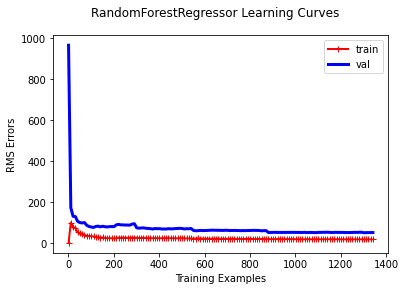

In [ ]:
plot_learning_curves(FinalModelRF, X_train, Y_train)